## A Woven Heptagram

Populating the interactive namespace from numpy and matplotlib


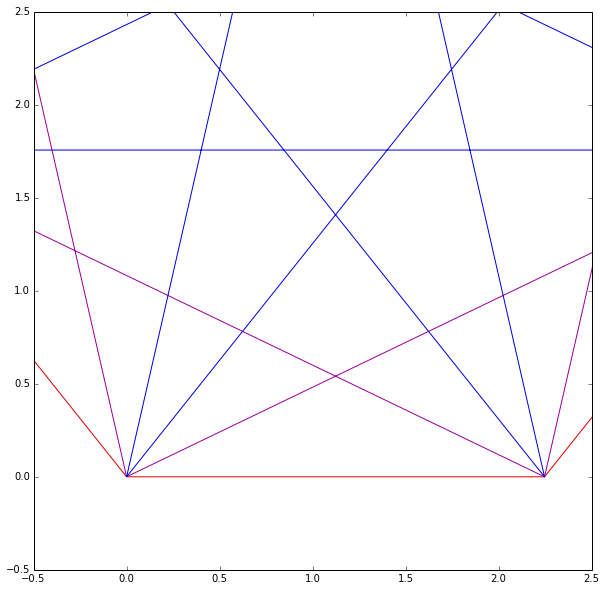

In [1]:
# load the definitions from the previous notebook
%run SevenfoldRotation.py

%pylab inline

def drawFigure( *patches ) :
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for patch in patches :
        ax.add_patch( patch )
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-0.5,2.5)

patches = []
patches .append( drawPolygon( heptagon,'#dd0000', skewRender ) )
patches .append( drawPolygon( heptagram_rho,'#990099', skewRender ) )
patches .append( drawPolygon( heptagram_sigma,'#0000dd', skewRender ) )

drawFigure( *patches )

In [2]:

class Vector(object):

    def __init__( self, x, y ):
        self.x = x
        self.y = y

    def __mul__( self, rhs ) :
        return Vector( rhs .__mul__( self.x ), rhs .__mul__( self.y ) )

    def __add__( self, rhs ) :
        return Vector( self.x + rhs.x, self.y + rhs.y )

    def __sub__( self, rhs ) :
        return Vector( self.x - rhs.x, self.y - rhs.y )

    def __neg__( self ) :
        return Vector( -self.x, -self.y )

    def render( self ):
        x = float( self.x )
        y = float( self.y )
        x = x + y/(2*HeptagonNumber.sigma_real)
        y = math.sin( (3.0/7.0) * math.pi ) * y
        return [ x, y ]

origin = Vector( zero, zero )


In [3]:
def makePatch( stripVertices, color ):
    n = len( stripVertices )
    codes = [ Path.MOVETO ]
    verts = []
    verts .append( stripVertices[ 0 ] .render() )
    for i in range(1,n+1):
        codes.append ( Path.LINETO )
        verts.append ( stripVertices[ i % n ] .render() )
    path = mpath.Path( verts, codes )
    return mpatches.PathPatch( path, facecolor='none', edgecolor=color )


In [4]:
P0 = origin
P1 = Vector( sigma, zero )
P2 = Vector( sigma+1, rho )
P3 = Vector( sigma, rho*sigma )
P4 = Vector( zero, sigma*sigma )
P5 = Vector( -rho, rho*sigma )
P6 = Vector( -rho, rho )

heptagon = [ P0, P1, P2, P3, P4, P5, P6 ]

heptagram_rho = [ P0, P2, P4, P6, P1, P3, P5 ]

heptagram_sigma = [ P0, P3, P6, P2, P5, P1, P4 ]

U2 = P2 * rho_inv
U3 = P2 - P1
U4 = P4 * sigma_inv
U5 = P5 * rho_inv

C1 = U4 * rho_over_sigma
C2 = P1 + P6
C3 = P1 + P5 * sigma_inv
C4 = U3 * rho_over_sigma
C5 = U4 * sigma_inv
C6 = C4 * rho_inv
C7 = U2 * rho_inv
C8 = U2 * rho_over_sigma

factor_a = rho_inv * rho_inv * rho_inv * sigma_inv

C2E = C2 + ( P1 - P6 ) * factor_a
C2N = C2 + C2 * factor_a
C3W = U3 + P2 * factor_a
C3S = C3 - ( P5 * sigma_inv ) * factor_a - ( P1 * rho_over_sigma ) * factor_a

stripA = [ C3S, C3W, C2N, C2E ]

U3W = C2E
U3S = U3 + ( P1 - U3 ) * factor_a
C6N = C6 + U5 * factor_a
C6E = C6 + ( C4 + P1 - C6 ) * factor_a

stripB = [ U3S, U3W, C6N, C6E ]

stripC = [ C4E, C4S, P12, P13, VCE ]

C5E = C5 + U2 * factor_a
C5S = C5 - C1 * factor_a + ( C5 - P6 ) * factor_a
C7W = C7 + ( P5 - P3 ) * factor_a
C7N = C7 + ( U2 + ( C5 - P1 ) ) * factor_a

stripD = [ C5E, C5S, C7W, C7N ]

patches = []
patches .append( makePatch( heptagon,'#dd0000' ) )
patches .append( makePatch( heptagram_rho,'#990099' ) )
patches .append( makePatch( heptagram_sigma,'#0000dd' ) )
patches .append( makePatch( stripA, '#55bb55' ) )
patches .append( makePatch( stripB, '#55bb55' ) )
patches .append( makePatch( stripD, '#55bb55' ) )

drawFigure( *patches )


NameError: name 'C4E' is not defined